In [30]:
import pandas as pd

file_path = '..\data\crime\police_recorded_offences\\'
columns_to_include = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

df_homicide = pd.read_csv(file_path+"homicide.csv", usecols=columns_to_include)
df_rape = pd.read_csv(file_path+"rape.csv", usecols=columns_to_include)
df_sexual_assault = pd.read_csv(file_path+"sexual_assault.csv", usecols=columns_to_include)
df_sexual_violence = pd.read_csv(file_path+"sexual_violence.csv", usecols=columns_to_include)
df_theft = pd.read_csv(file_path+"theft.csv", usecols=columns_to_include)

df_homicide.isnull().sum().sum(), df_rape.isnull().sum().sum(), df_sexual_assault.isnull().sum().sum(), df_sexual_violence.isnull().sum().sum(), df_theft.isnull().sum().sum()

# creare un grafico temporale che evidenzi la differenza tra la media dei diversi crimini

(0, 0, 0, 0, 0)

In [31]:
df_homicide

,geo,TIME_PERIOD,OBS_VALUE
0,Albania,2008,2.78
1,Albania,2009,2.57
2,Albania,2011,4.38
3,Albania,2014,3.38
4,Albania,2015,1.86
...,...,...,...
568,Kosovo*,2016,1.64
569,Kosovo*,2017,1.85
570,Kosovo*,2018,2.39
571,Kosovo*,2019,1.28


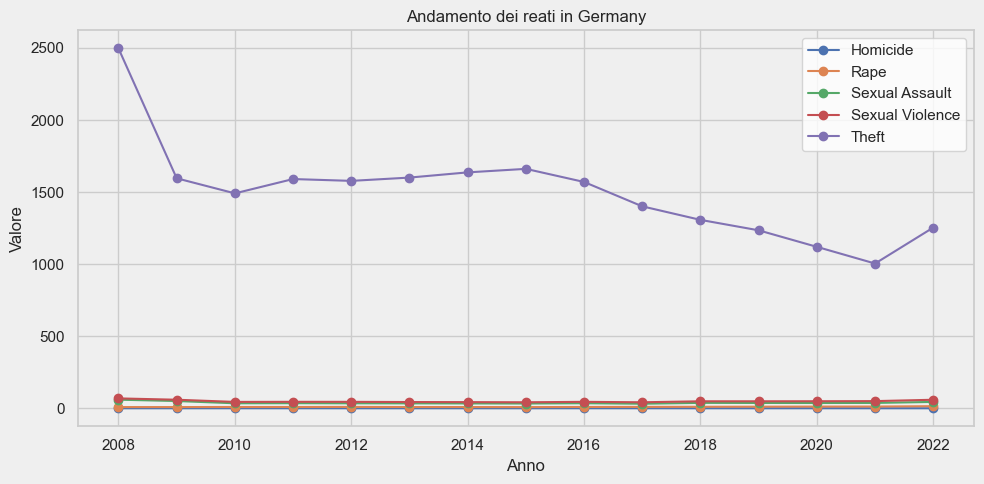

In [32]:
import matplotlib.pyplot as plt

country = 'Germany'

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

plt.figure(figsize=(10,5))

for df, label in dfs:
    df_c = df[df['geo'] == country].dropna(subset=['OBS_VALUE']).sort_values('TIME_PERIOD')
    if not df_c.empty:
        plt.plot(df_c['TIME_PERIOD'], df_c['OBS_VALUE'], marker='o', label=label)

plt.title(f'Andamento dei reati in {country}')
plt.xlabel('Anno')
plt.ylabel('Valore')
plt.grid(True)
plt.legend()
plt.tight_layout()
# Rimozione dei bordi del grafico
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#efefef")
plt.show()

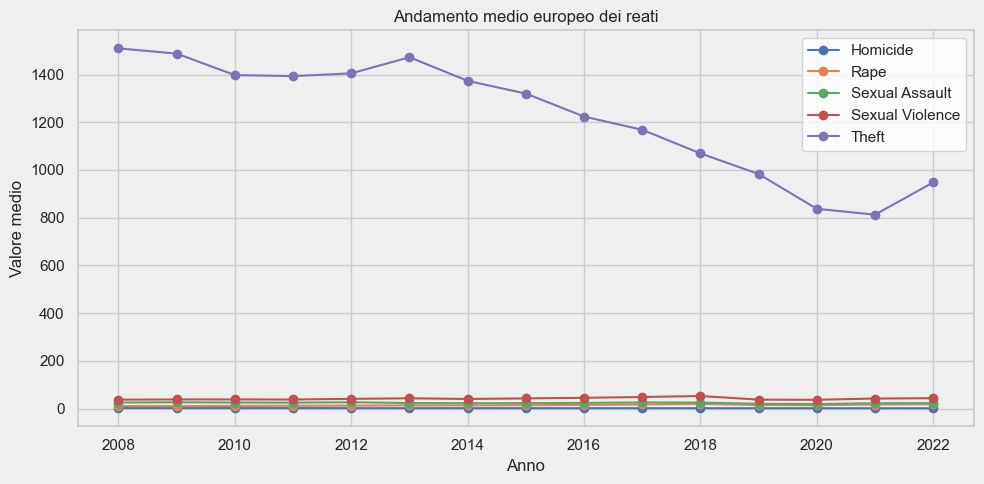

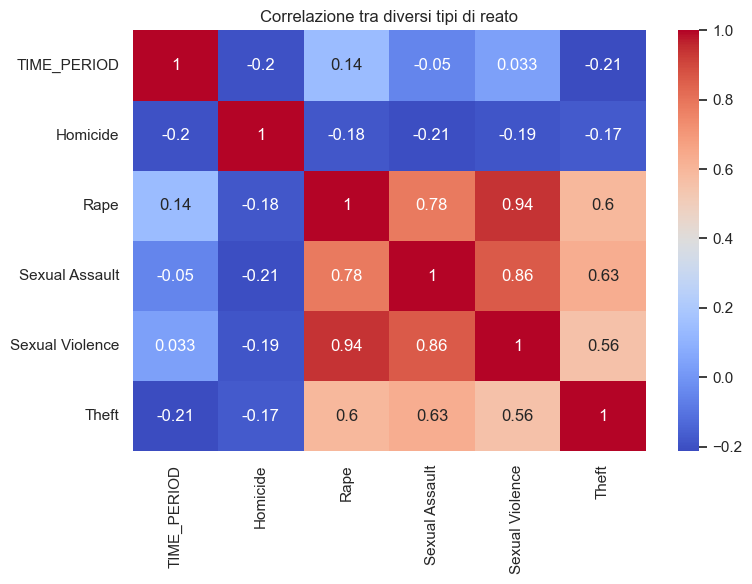

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

all_data = pd.DataFrame()
for df, crime_name in dfs:
    temp = df.dropna(subset=['OBS_VALUE']).copy()
    temp = temp.groupby(['geo','TIME_PERIOD'], as_index=False)['OBS_VALUE'].mean()
    temp.rename(columns={'OBS_VALUE': crime_name}, inplace=True)
    if all_data.empty:
        all_data = temp
    else:
        all_data = pd.merge(all_data, temp, on=['geo','TIME_PERIOD'], how='outer')

corr = all_data.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlazione tra diversi tipi di reato')
plt.tight_layout()
plt.show()


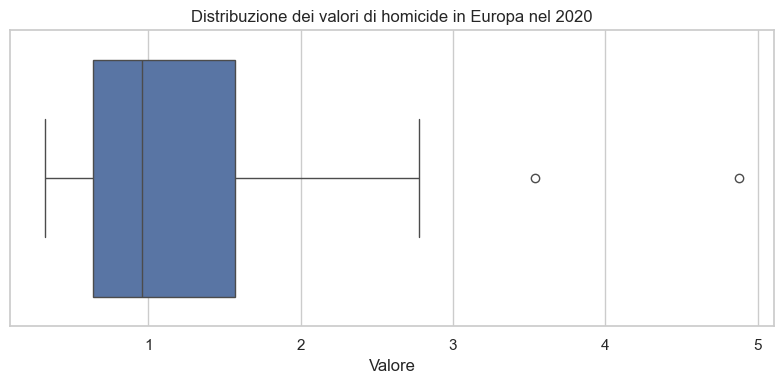

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

anno = 2020
df_year = df_homicide[df_homicide['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])

plt.figure(figsize=(8,4))
sns.boxplot(x='OBS_VALUE', data=df_year)
plt.title(f'Distribuzione dei valori di homicide in Europa nel {anno}')
plt.xlabel('Valore')
plt.tight_layout()
plt.show()


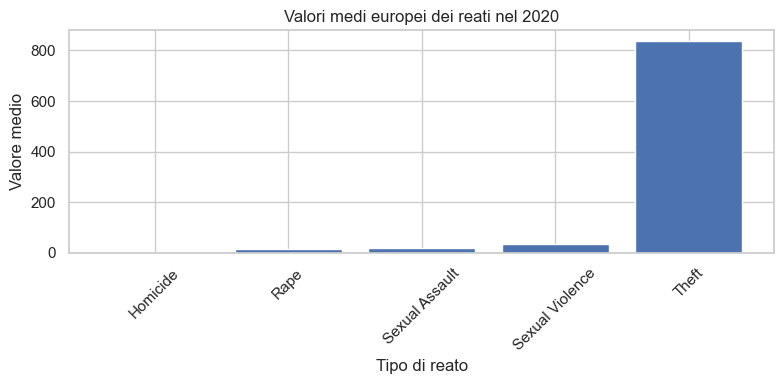

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

anno = 2020
medie = {}
for df, crime_name in dfs:
    df_mean = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    if not df_mean.empty:
        medie[crime_name] = df_mean['OBS_VALUE'].mean()

crime_types = list(medie.keys())
values = list(medie.values())

plt.figure(figsize=(8,4))
plt.bar(crime_types, values)
plt.title(f'Valori medi europei dei reati nel {anno}')
plt.xlabel('Tipo di reato')
plt.ylabel('Valore medio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


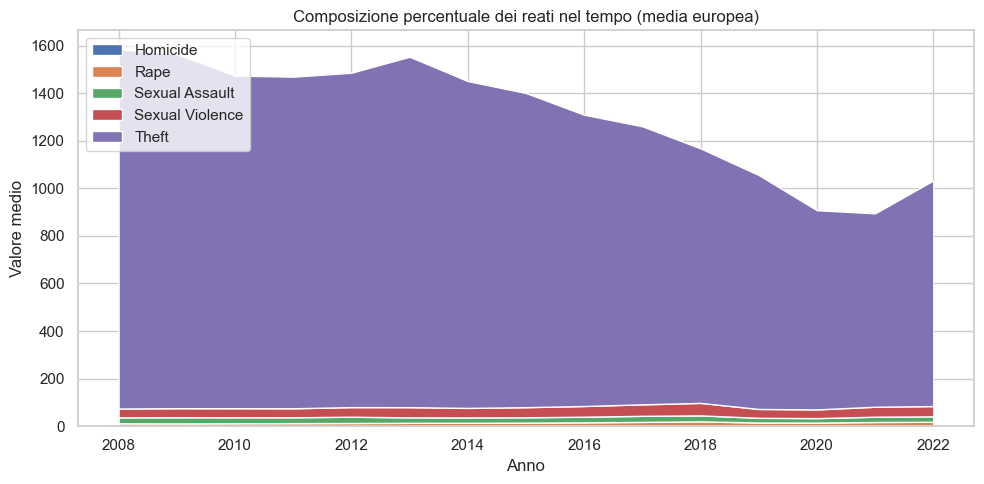

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcola le medie europee per ogni anno e ogni reato
years = None
merged = pd.DataFrame()

for df, crime_name in dfs:
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()
    df_mean.rename(columns={'OBS_VALUE': crime_name}, inplace=True)
    if merged.empty:
        merged = df_mean
    else:
        merged = pd.merge(merged, df_mean, on='TIME_PERIOD', how='outer')

merged = merged.sort_values('TIME_PERIOD').fillna(0)
years = merged['TIME_PERIOD']
data = merged.drop(columns='TIME_PERIOD')

plt.figure(figsize=(10,5))
plt.stackplot(years, [data[c] for c in data.columns], labels=data.columns)
plt.title('Composizione percentuale dei reati nel tempo (media europea)')
plt.xlabel('Anno')
plt.ylabel('Valore medio')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


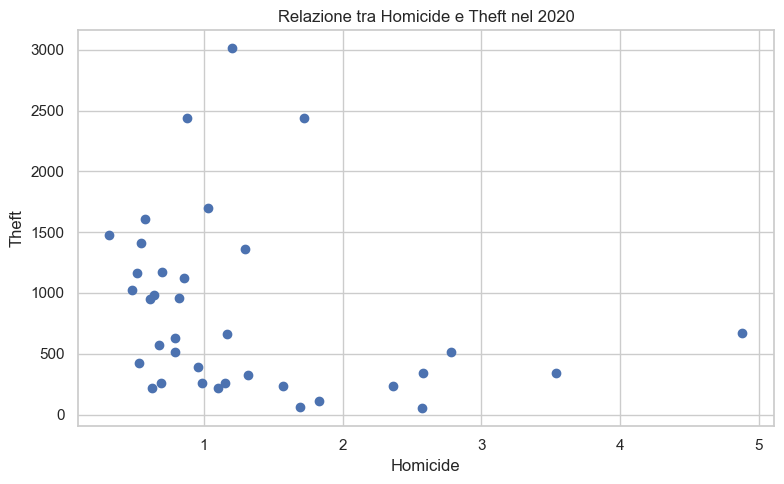

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

anno = 2020
crime_x = 'Homicide'
crime_y = 'Theft'

# Ottieni i dataframe medi per paese nel dato anno
def get_year_data(df, crime_name, anno):
    temp = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    temp = temp[['geo','OBS_VALUE']].copy()
    temp.rename(columns={'OBS_VALUE': crime_name}, inplace=True)
    return temp

df_h = get_year_data(df_homicide, crime_x, anno)
df_t = get_year_data(df_theft, crime_y, anno)

merged_scatter = pd.merge(df_h, df_t, on='geo', how='inner')

plt.figure(figsize=(8,5))
plt.scatter(merged_scatter[crime_x], merged_scatter[crime_y])
plt.title(f'Relazione tra {crime_x} e {crime_y} nel {anno}')
plt.xlabel(crime_x)
plt.ylabel(crime_y)
plt.grid(True)
plt.tight_layout()
plt.show()


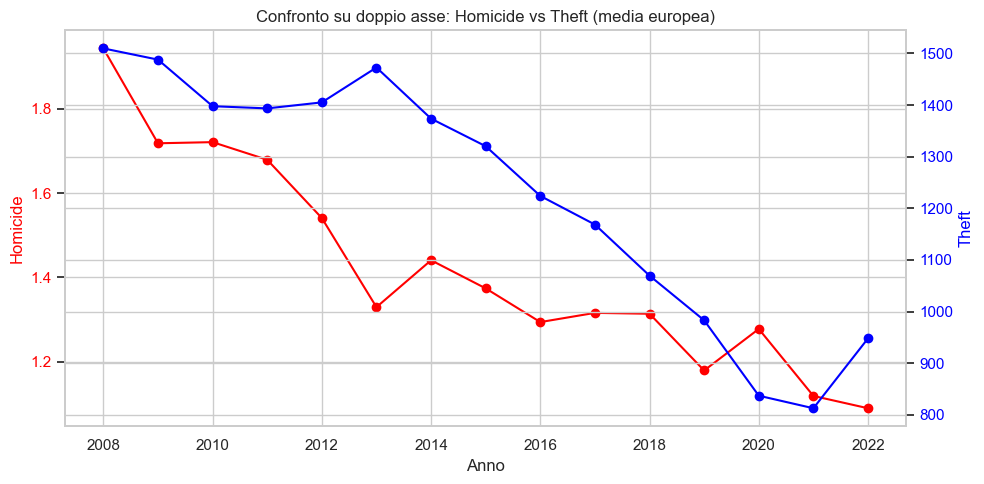

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Esempio: confronto tra Theft e Homicide a livello europeo (media annua)
df_theft_mean = df_theft.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()
df_homicide_mean = df_homicide.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()

merged = pd.merge(df_theft_mean, df_homicide_mean, on='TIME_PERIOD', how='inner', suffixes=('_theft','_homicide'))
merged = merged.sort_values('TIME_PERIOD')

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(merged['TIME_PERIOD'], merged['OBS_VALUE_homicide'], color='red', marker='o', label='Homicide')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Homicide', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(merged['TIME_PERIOD'], merged['OBS_VALUE_theft'], color='blue', marker='o', label='Theft')
ax2.set_ylabel('Theft', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Confronto su doppio asse: Homicide vs Theft (media europea)')
fig.tight_layout()
plt.show()


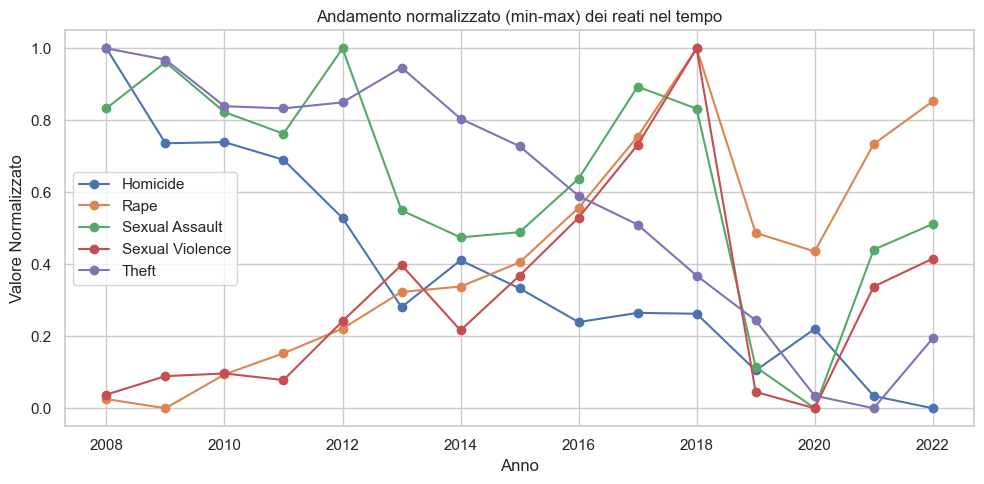

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

norm_data = pd.DataFrame()

for df, label in dfs:
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()
    df_mean = df_mean.sort_values('TIME_PERIOD')
    # Normalizzazione min-max
    val_min = df_mean['OBS_VALUE'].min()
    val_max = df_mean['OBS_VALUE'].max()
    df_mean[label] = (df_mean['OBS_VALUE'] - val_min) / (val_max - val_min)
    if norm_data.empty:
        norm_data['TIME_PERIOD'] = df_mean['TIME_PERIOD']
    norm_data[label] = df_mean[label].values

plt.figure(figsize=(10,5))
for col in norm_data.columns:
    if col != 'TIME_PERIOD':
        plt.plot(norm_data['TIME_PERIOD'], norm_data[col], marker='o', label=col)

plt.title('Andamento normalizzato (min-max) dei reati nel tempo')
plt.xlabel('Anno')
plt.ylabel('Valore Normalizzato')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


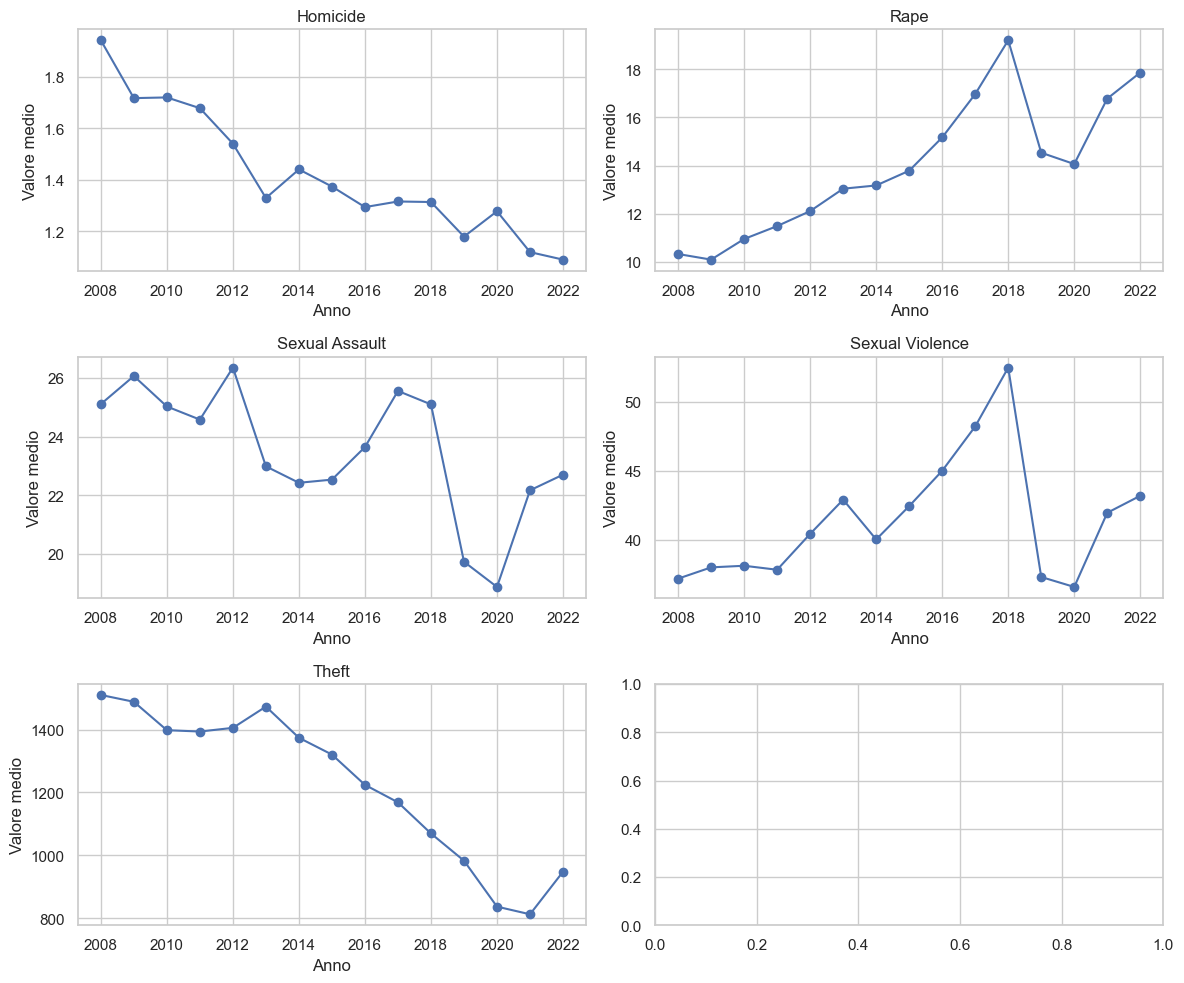

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12,10))  # 3 righe, 2 colonne (regola in base a quanti reati)
axs = axs.flatten()

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

for i, (df, label) in enumerate(dfs):
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean().sort_values('TIME_PERIOD')
    axs[i].plot(df_mean['TIME_PERIOD'], df_mean['OBS_VALUE'], marker='o')
    axs[i].set_title(label)
    axs[i].set_xlabel('Anno')
    axs[i].set_ylabel('Valore medio')
    axs[i].grid(True)

fig.tight_layout()
plt.show()


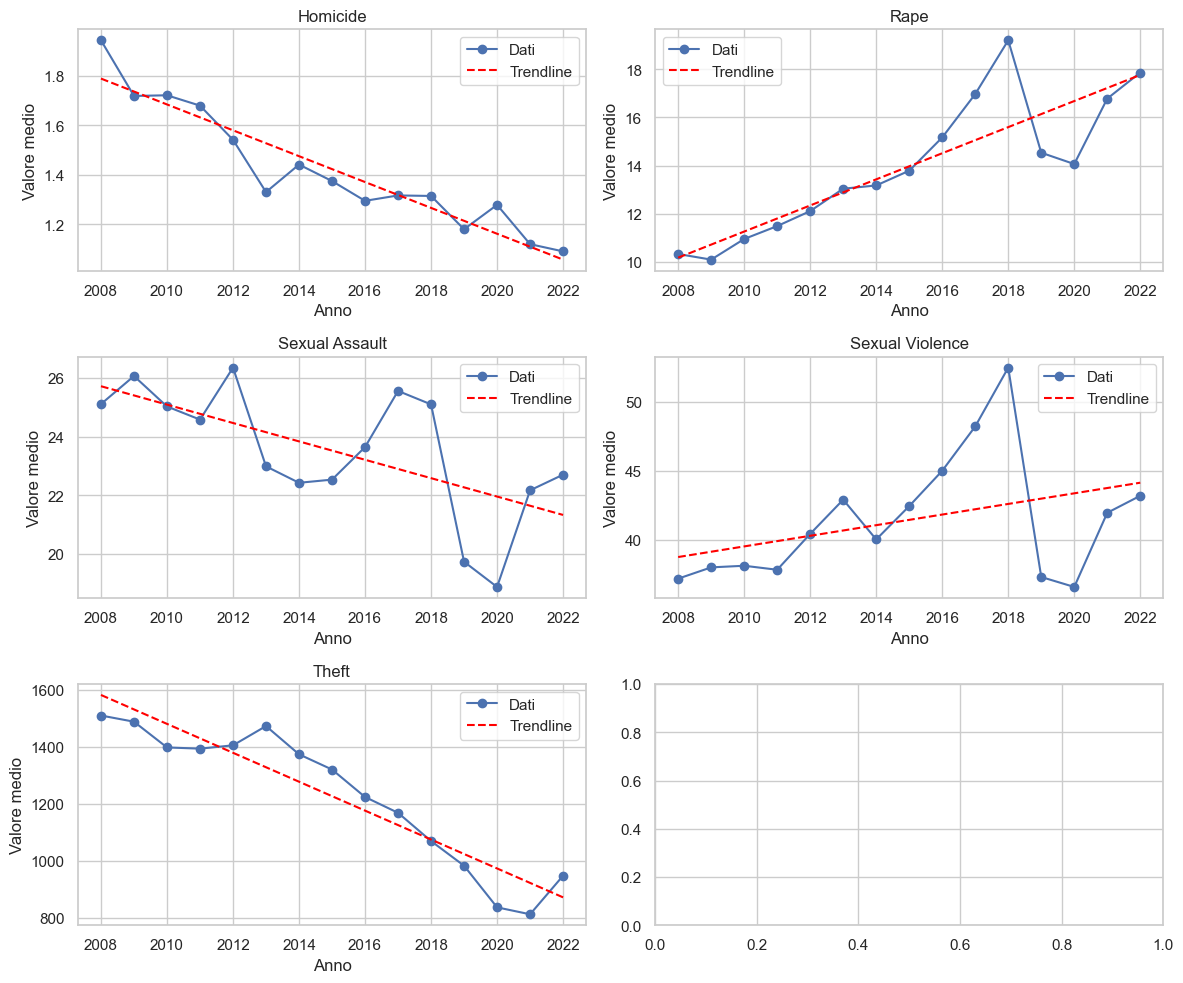

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # 3 righe, 2 colonne (regola in base a quanti reati)
axs = axs.flatten()

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

for i, (df, label) in enumerate(dfs):
    # Calcola la media dei dati
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean().sort_values('TIME_PERIOD')
    
    # Plotta i dati
    axs[i].plot(df_mean['TIME_PERIOD'], df_mean['OBS_VALUE'], marker='o', label='Dati')
    
    # Calcola la trendline
    x = df_mean['TIME_PERIOD']
    y = df_mean['OBS_VALUE']
    if len(x) > 1:  # Solo se ci sono abbastanza dati
        z = np.polyfit(x, y, 1)  # Regressione lineare (grado 1)
        p = np.poly1d(z)
        axs[i].plot(x, p(x), linestyle='--', color='red', label='Trendline')  # Aggiungi la trendline

    # Configura titolo e assi
    axs[i].set_title(label)
    axs[i].set_xlabel('Anno')
    axs[i].set_ylabel('Valore medio')
    axs[i].grid(True)
    axs[i].legend()

# Regola il layout
fig.tight_layout()
plt.show()


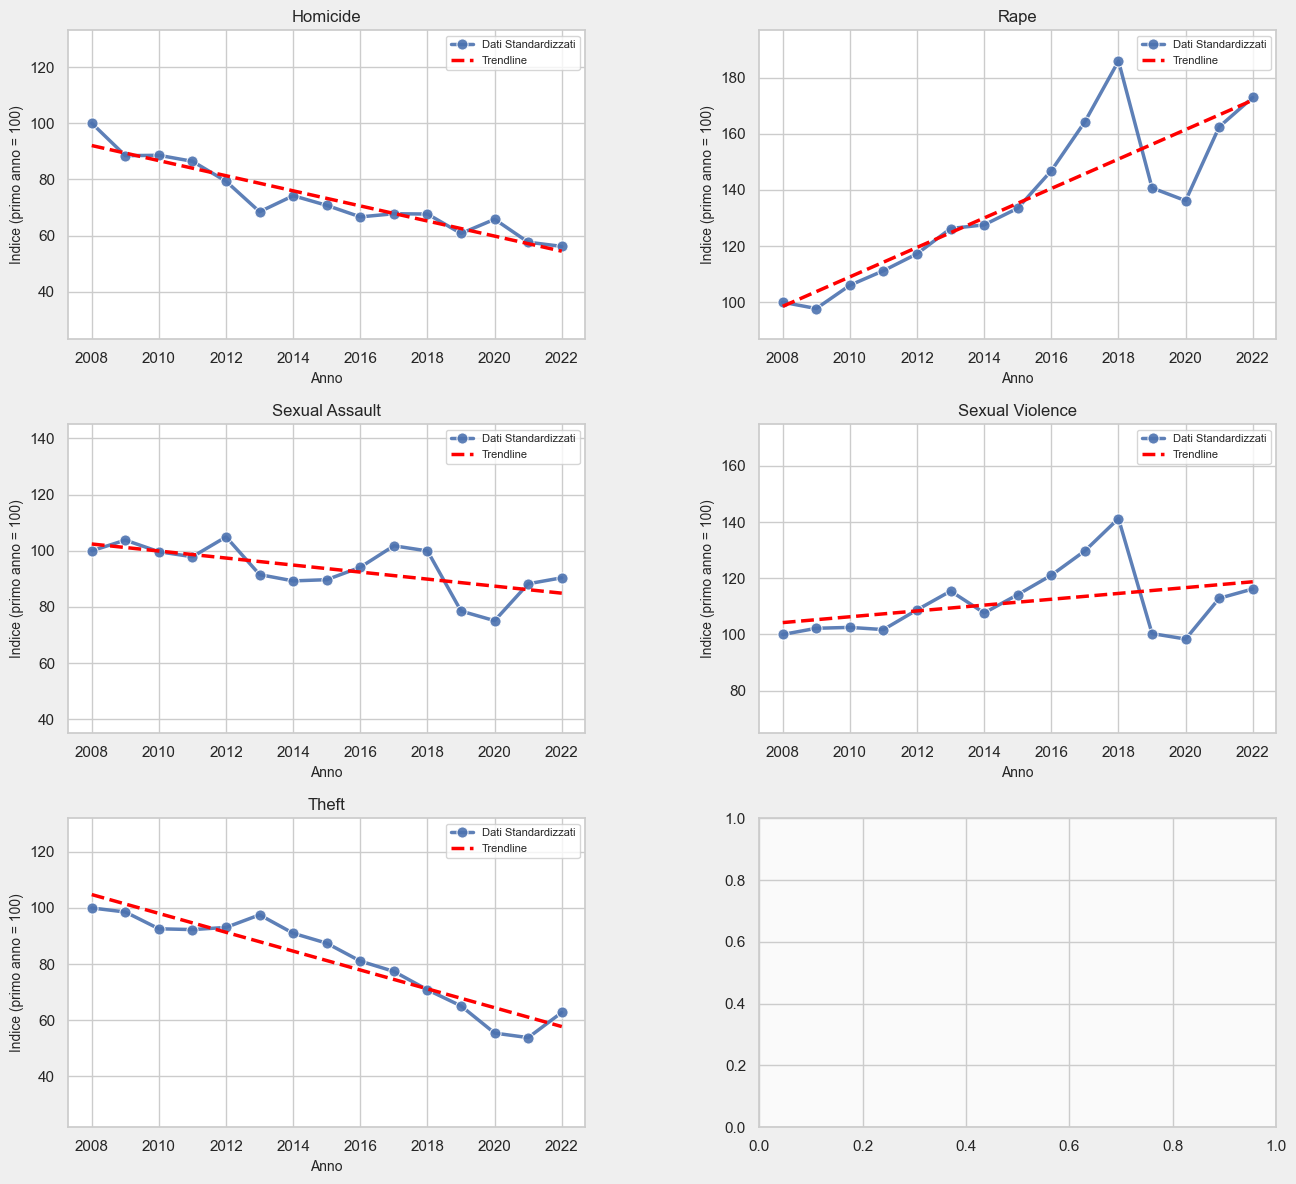

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

sns.set(style="whitegrid")

for i, (df, label) in enumerate(dfs):
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean()
    
    # Standardizzazione: primo anno = 100
    first_year_value = df_mean['OBS_VALUE'].iloc[0]
    df_mean['OBS_VALUE'] = (df_mean['OBS_VALUE'] / first_year_value) * 100
    
    # Plot dei dati
    sns.lineplot(
        ax=axs[i],
        data=df_mean,
        x='TIME_PERIOD',
        y='OBS_VALUE',
        marker='o',
        label='Dati Standardizzati',
        linewidth=2.5,  # Spessore della linea principale
        markersize=8,   # Dimensione dei pallini
        alpha=0.9
    )
    
    # Trendline
    x = df_mean['TIME_PERIOD']
    y = df_mean['OBS_VALUE']
    if len(x) > 1:
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        axs[i].plot(x, p(x), linestyle='--', color='red', label='Trendline',  linewidth=2.5)

    # Configura titolo e assi
    axs[i].set_title(label, fontsize=12)
    axs[i].set_xlabel('Anno', fontsize=10)
    axs[i].set_ylabel('Indice (primo anno = 100)', fontsize=10)
    axs[i].grid(True)
    axs[i].legend(fontsize=8)
    
    # Calcola il range da applicare
    local_min = df_mean['OBS_VALUE'].min()
    local_max = df_mean['OBS_VALUE'].max()
    center = (local_min + local_max) / 2.0
    axs[i].set_ylim(center - 55, center + 55)

plt.subplots_adjust(wspace=100000, hspace=1)
plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#fafafa")
fig.tight_layout()
plt.show()


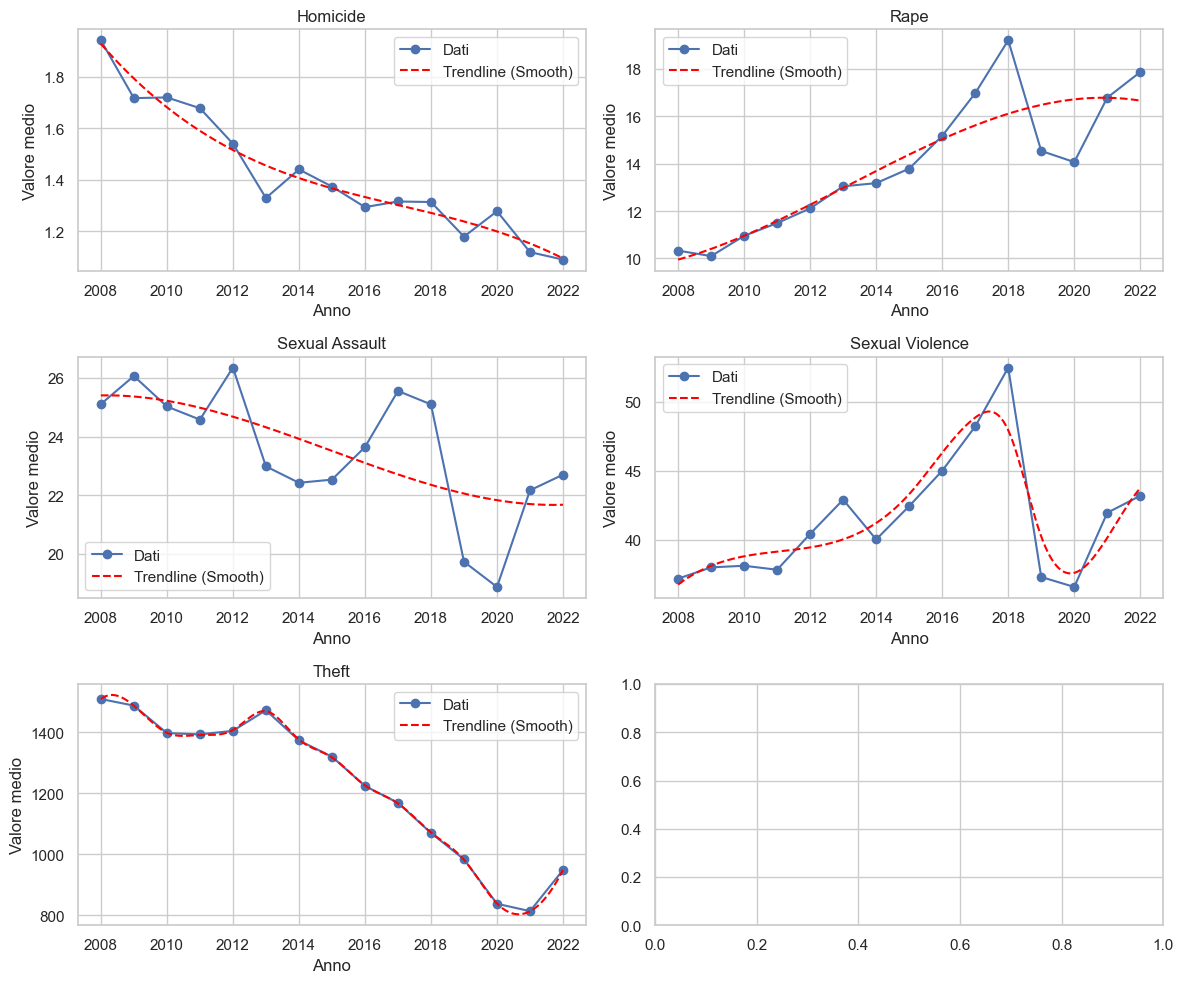

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline

fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # 3 righe, 2 colonne (regola in base a quanti reati)
axs = axs.flatten()

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

for i, (df, label) in enumerate(dfs):
    # Calcola la media dei dati
    df_mean = df.dropna(subset=['OBS_VALUE']).groupby('TIME_PERIOD', as_index=False)['OBS_VALUE'].mean().sort_values('TIME_PERIOD')
    
    # Plotta i dati
    axs[i].plot(df_mean['TIME_PERIOD'], df_mean['OBS_VALUE'], marker='o', label='Dati')
    
    # Calcola la trendline morbida (spline)
    x = df_mean['TIME_PERIOD']
    y = df_mean['OBS_VALUE']
    if len(x) > 3:  # Solo se ci sono abbastanza punti
        spline = UnivariateSpline(x, y)
        spline.set_smoothing_factor(50)  # Regola la "morbidezza" della spline
        x_smooth = np.linspace(x.min(), x.max(), 200)  # Maggiori punti per una curva fluida
        axs[i].plot(x_smooth, spline(x_smooth), linestyle='--', color='red', label='Trendline (Smooth)')

    # Configura titolo e assi
    axs[i].set_title(label)
    axs[i].set_xlabel('Anno')
    axs[i].set_ylabel('Valore medio')
    axs[i].grid(True)
    axs[i].legend()

# Regola il layout
fig.tight_layout()
plt.show()


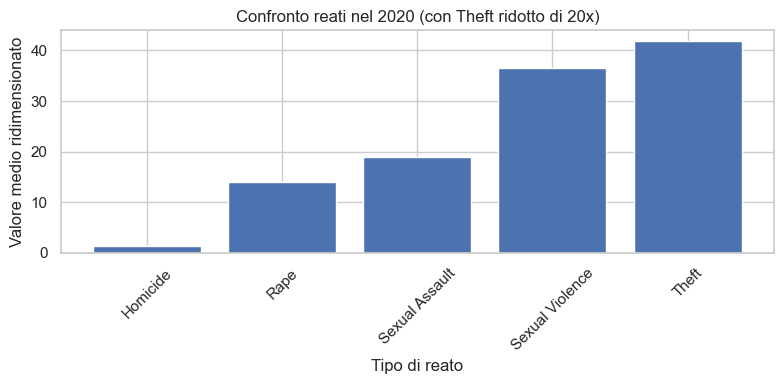

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

anno = 2020
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

medie = {}
for df, crime_name in dfs:
    df_mean = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    if not df_mean.empty:
        val = df_mean['OBS_VALUE'].mean()
        if crime_name == 'Theft':  
            # Riduci theft di un fattore per renderlo confrontabile
            val = val / 20.0  
        medie[crime_name] = val

crime_types = list(medie.keys())
values = list(medie.values())

plt.figure(figsize=(8,4))
plt.bar(crime_types, values)
plt.title(f'Confronto reati nel {anno} (con Theft ridotto di 20x)')
plt.xlabel('Tipo di reato')
plt.ylabel('Valore medio ridimensionato')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


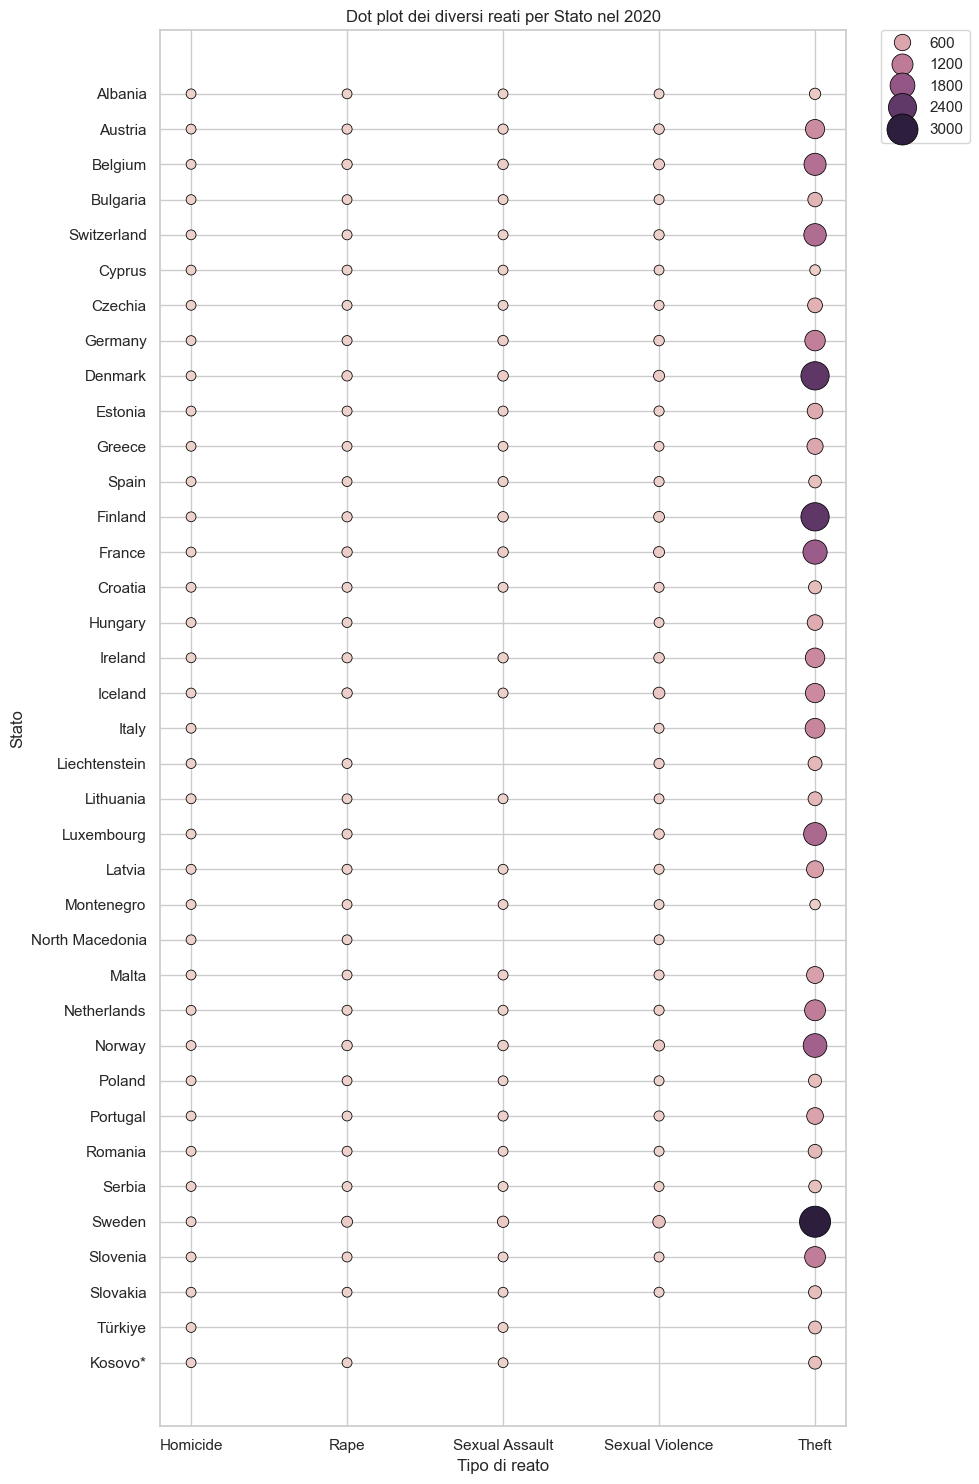

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

anno = 2020

# Lista dei dataset e del nome del tipo di reato
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

# Creiamo un unico DataFrame in formato "long"
data_list = []
for df, crime_name in dfs:
    df_filtered = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    for _, row in df_filtered.iterrows():
        data_list.append({
            'geo': row['geo'],
            'Crime': crime_name,
            'Value': row['OBS_VALUE']
        })

df_all = pd.DataFrame(data_list)

# Imposta uno stile più pulito
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,15))  # più alto per elencare gli stati in verticale
# scatterplot con x = Crime, y = Stato, dimensione del pallino = Valore
sns.scatterplot(data=df_all, x='Crime', y='geo', size='Value', hue='Value',
                sizes=(50, 500), legend='brief', edgecolor='black')

plt.title(f'Dot plot dei diversi reati per Stato nel {anno}')
plt.xlabel('Tipo di reato')
plt.ylabel('Stato')

# Puoi regolare la leggenda se serve, ad es. per mostrare la scala dei valori
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()



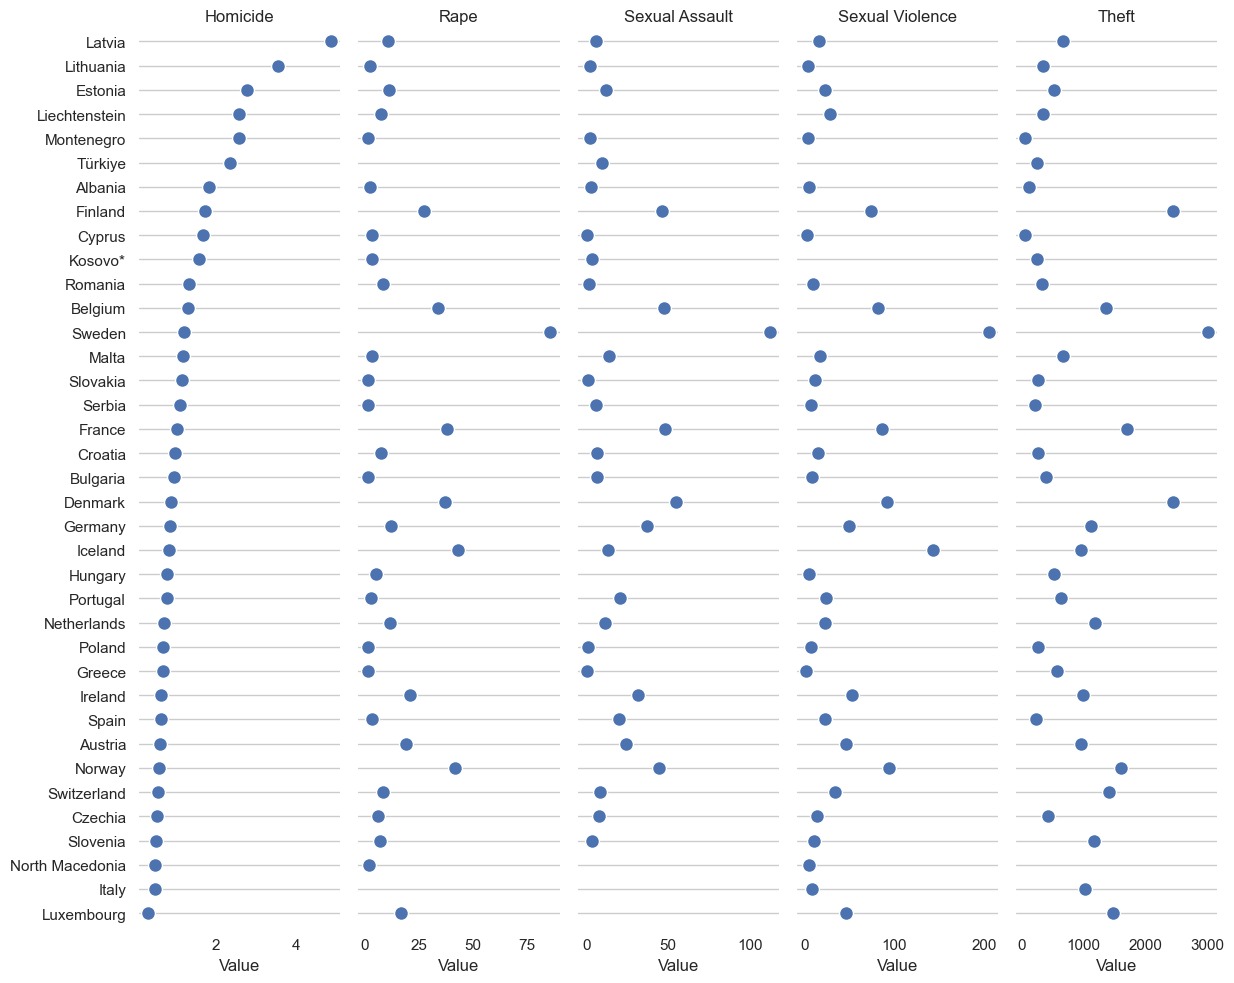

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

anno = 2020

# Lista dei dataset con i nomi dei crimini
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

# Creazione del DataFrame in formato wide
data = None
for df, crime_name in dfs:
    temp = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    temp = temp[['geo', 'OBS_VALUE']].rename(columns={'OBS_VALUE': crime_name})
    if data is None:
        data = temp
    else:
        data = pd.merge(data, temp, on='geo', how='outer')

# Ordina i paesi in base ad uno dei crimini, ad es. in base a 'Homicide'
data = data.sort_values('Homicide', ascending=False)

# Seleziona le colonne dei crimini da mostrare
x_vars = ['Homicide', 'Rape', 'Sexual Assault', 'Sexual Violence', 'Theft']
y_vars = ['geo']

sns.set_theme(style="whitegrid")

# Crea il PairGrid
g = sns.PairGrid(data, x_vars=x_vars, y_vars=y_vars, height=10, aspect=.25)

# Disegna il dot plot (stripplot)
g.map(sns.stripplot, size=10, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")

# Imposta i limiti degli assi X se necessario (adatta in base ai tuoi dati)
# g.set(xlim=(0, 25))  # rimuovi o adatta questo in base ai tuoi dati reali

g.set(xlabel="Value", ylabel="")

# Titoli per ogni colonna
titles = ["Homicide", "Rape", "Sexual Assault", "Sexual Violence", "Theft"]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    # Rimuovi grid verticale e aggiungi quella orizzontale
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


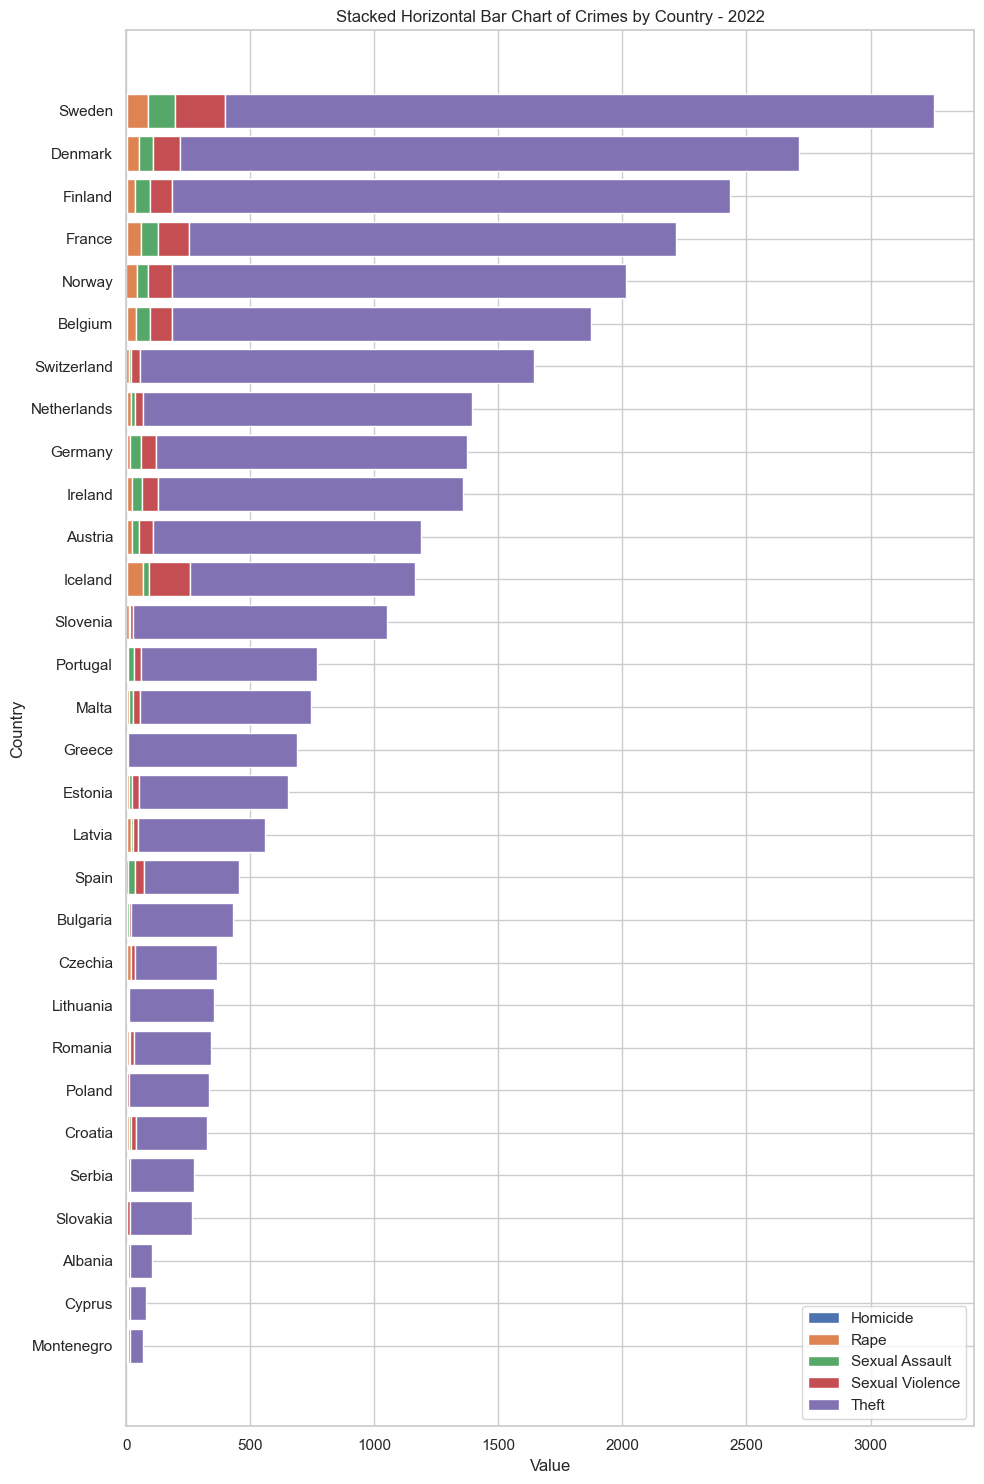

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Sostituisci questi DataFrame con i tuoi effettivi
# Qui si assume che df_homicide, df_rape, df_sexual_assault, df_sexual_violence e df_theft
# siano già stati caricati con colonne: ['geo', 'TIME_PERIOD', 'OBS_VALUE']

# Parametri
anno = 2022
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

# Creazione di un DataFrame wide per l'anno specificato
data = None
for df, crime_name in dfs:
    temp = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    temp = temp[['geo','OBS_VALUE']].rename(columns={'OBS_VALUE': crime_name})
    if data is None:
        data = temp
    else:
        data = pd.merge(data, temp, on='geo', how='outer')

# Rimuovi eventuali righe vuote e imposta l'indice su 'geo'
data = data.dropna()
data = data.set_index('geo')

# Ordina i paesi in base a un crimine o in base alla somma totale
data['Total'] = data.sum(axis=1)
data = data.sort_values('Total', ascending=True)

# Rimuovi la colonna "Total" ora che non serve più
data = data.drop(columns='Total')

# Lista dei crimini in ordine come vuoi che appaiano nello stack
categories = ['Homicide', 'Rape', 'Sexual Assault', 'Sexual Violence', 'Theft']

fig, ax = plt.subplots(figsize=(10, 15))

# Costruzione dello stacked bar chart orizzontale
left = [0]*len(data)
for cat in categories:
    ax.barh(y=data.index, width=data[cat], left=left, label=cat)
    # Aggiorna il punto di partenza per lo stack successivo
    left = [l + v for l, v in zip(left, data[cat])]

ax.set_xlabel('Value')
ax.set_ylabel('Country')
ax.set_title(f'Stacked Horizontal Bar Chart of Crimes by Country - {anno}')
ax.legend()

plt.tight_layout()
plt.show()


## Nel grafico sopra potrei lasciare furti e raggruppare gli altri tipi di reato con un unico colore.

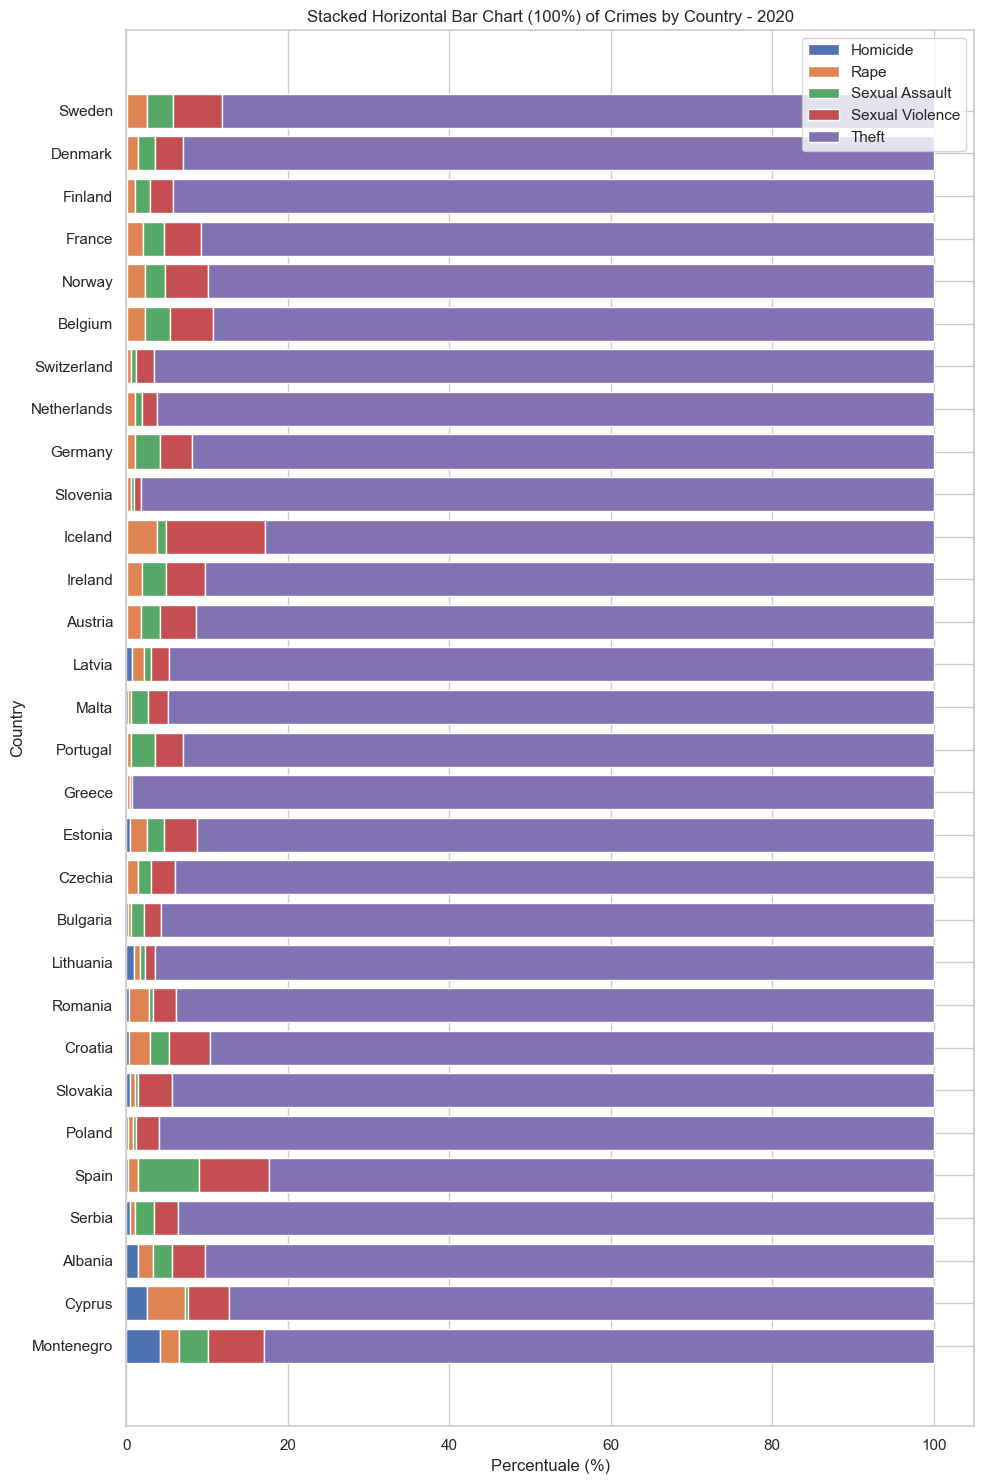

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Parametri
anno = 2020

# Lista dei dataset con i nomi dei crimini
dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

# Creazione di un DataFrame wide per l'anno specificato
data = None
for df, crime_name in dfs:
    temp = df[df['TIME_PERIOD'] == anno].dropna(subset=['OBS_VALUE'])
    temp = temp[['geo','OBS_VALUE']].rename(columns={'OBS_VALUE': crime_name})
    if data is None:
        data = temp
    else:
        data = pd.merge(data, temp, on='geo', how='outer')

# Rimuovi righe con valori NaN e imposta geo come indice
data = data.dropna().set_index('geo')

# Ordina i paesi in base al totale (se vuoi)
data['Total'] = data.sum(axis=1)
data = data.sort_values('Total', ascending=True)
data = data.drop(columns='Total')

# Converte i valori in percentuali
data_percent = data.div(data.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 15))

left = [0]*len(data_percent)
categories = data_percent.columns

for cat in categories:
    ax.barh(y=data_percent.index, width=data_percent[cat], left=left, label=cat)
    left = [l + v for l, v in zip(left, data_percent[cat])]

ax.set_xlabel('Percentuale (%)')
ax.set_ylabel('Country')
ax.set_title(f'Stacked Horizontal Bar Chart (100%) of Crimes by Country - {anno}')
ax.legend()

plt.tight_layout()
plt.show()


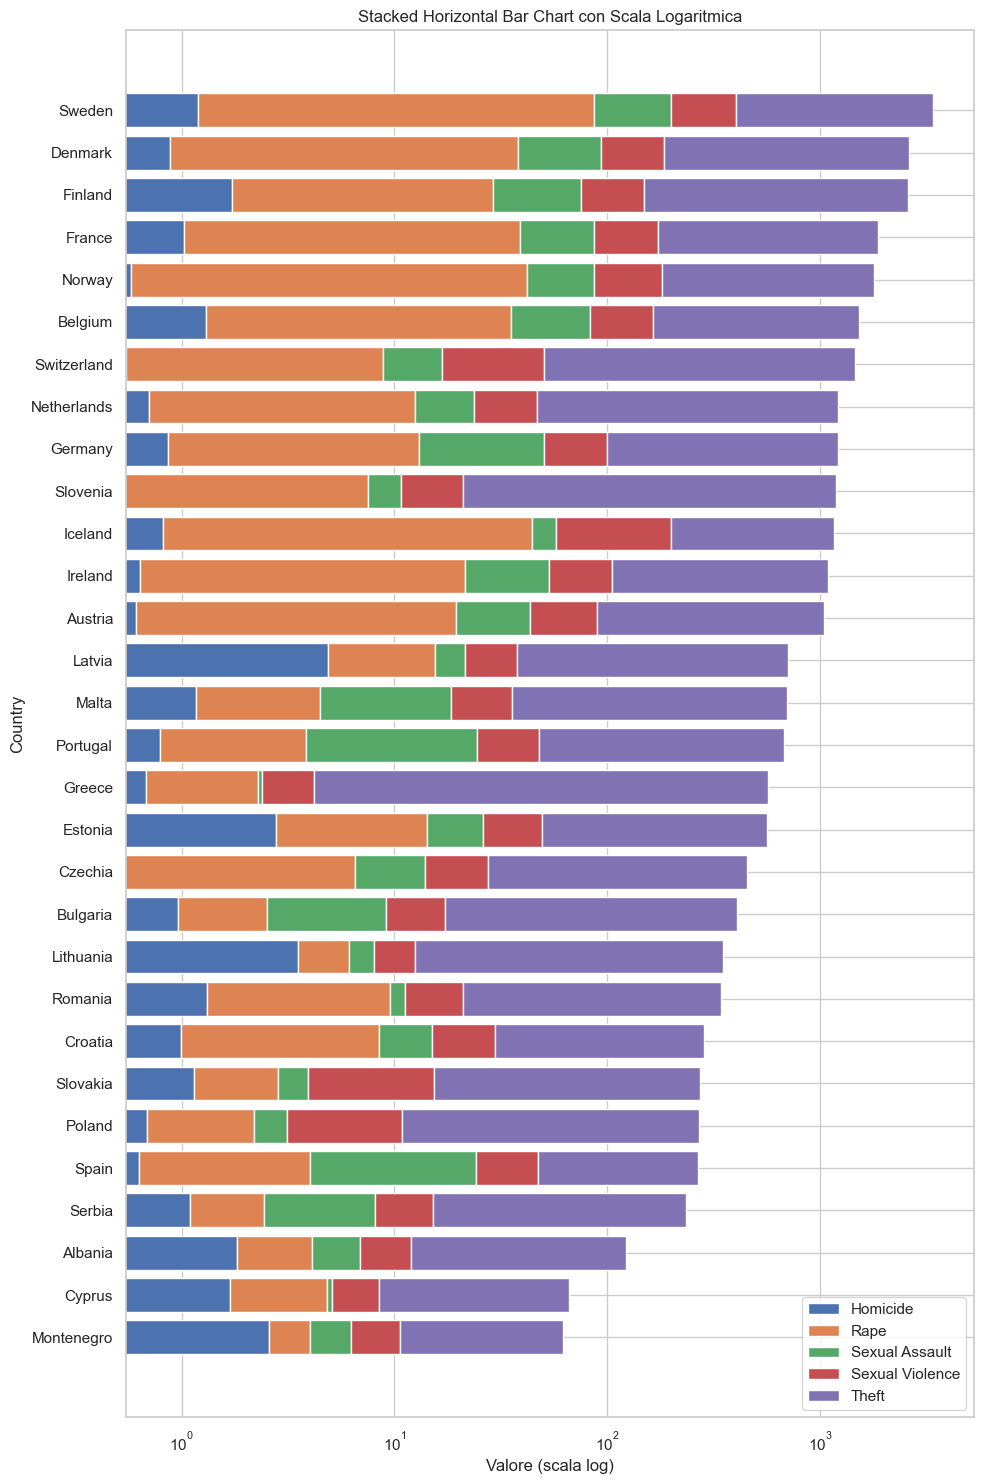

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che il DataFrame 'data' sia già definito e contenga i dati.
# Ogni riga è un paese (geo), ogni colonna un tipo di reato, e i valori sono numerici.
# Assumiamo che siano già filtrati per un anno e ordinati come preferisci.

# Esempio di creazione stack orizzontale
fig, ax = plt.subplots(figsize=(10, 15))

categories = data.columns
left = [0]*len(data)

for cat in categories:
    ax.barh(y=data.index, width=data[cat], left=left, label=cat)
    left = [l + v for l, v in zip(left, data[cat])]

ax.set_xscale('log')  # Imposta la scala logaritmica sull’asse X
ax.set_xlabel('Valore (scala log)')
ax.set_ylabel('Country')
ax.set_title('Stacked Horizontal Bar Chart con Scala Logaritmica')
ax.legend()

plt.tight_layout()
plt.show()


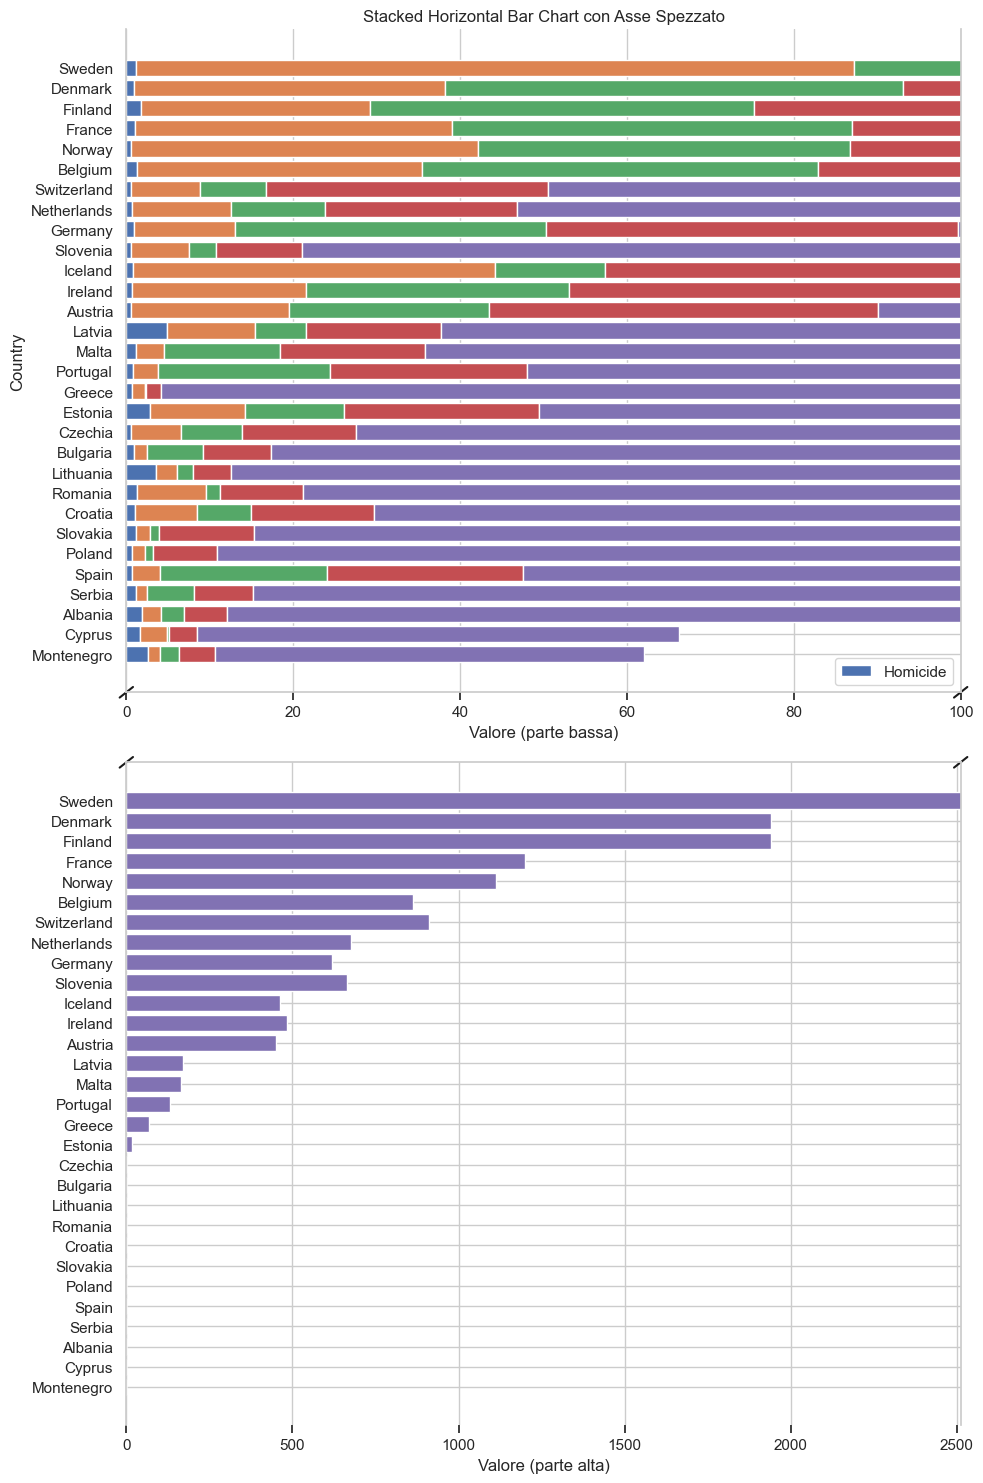

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supponiamo di avere valori che vanno da 0 a 3000 e vuoi "tagliare" l'asse tra 100 e 500.
low_limit_top = 100    # limite superiore della parte bassa
high_limit_bottom = 500 # limite inferiore della parte alta

fig, (ax_low, ax_high) = plt.subplots(2, 1, sharey=True, figsize=(10, 15))

categories = data.columns

# Disegno delle barre per entrambi gli assi
left_low = [0]*len(data)
left_high = [0]*len(data)

for cat in categories:
    values = data[cat]
    ax_low.barh(y=data.index, width=np.clip(values, 0, low_limit_top), left=left_low, label=cat if cat == categories[0] else "")
    ax_high.barh(y=data.index, width=np.clip(values, high_limit_bottom, None)-high_limit_bottom, left=left_high, label=cat if cat == categories[0] else "")
    
    # Aggiorna gli offset per le barre impilate
    left_low = [ll + np.clip(v, 0, low_limit_top) for ll, v in zip(left_low, values)]
    left_high = [lh + np.clip(v - high_limit_bottom, 0, None) for lh, v in zip(left_high, values)]

# Impostazione limiti assi
ax_low.set_xlim(0, low_limit_top)
ax_high.set_xlim(0, max(left_high))  # max possibile nella parte alta

ax_low.set_xlabel('Valore (parte bassa)')
ax_high.set_xlabel('Valore (parte alta)')
ax_low.set_ylabel('Country')
ax_low.set_title('Stacked Horizontal Bar Chart con Asse Spezzato')

# Rimuovi le spine e aggiungi le linee "spezzate"
ax_low.spines['top'].set_visible(False)
ax_high.spines['bottom'].set_visible(False)
ax_low.xaxis.tick_bottom()
ax_high.xaxis.tick_bottom()

d = 0.008  # dimensione della "diagonale"
kwargs = dict(transform=ax_low.transAxes, color='k', clip_on=False)
ax_low.plot((1 - d, 1 + d), (-d, d), **kwargs)  
ax_low.plot((-d, d), (-d, d), **kwargs)         

kwargs = dict(transform=ax_high.transAxes, color='k', clip_on=False)
ax_high.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  
ax_high.plot((-d, d), (1 - d, 1 + d), **kwargs)

ax_low.legend()

plt.tight_layout()
plt.show()


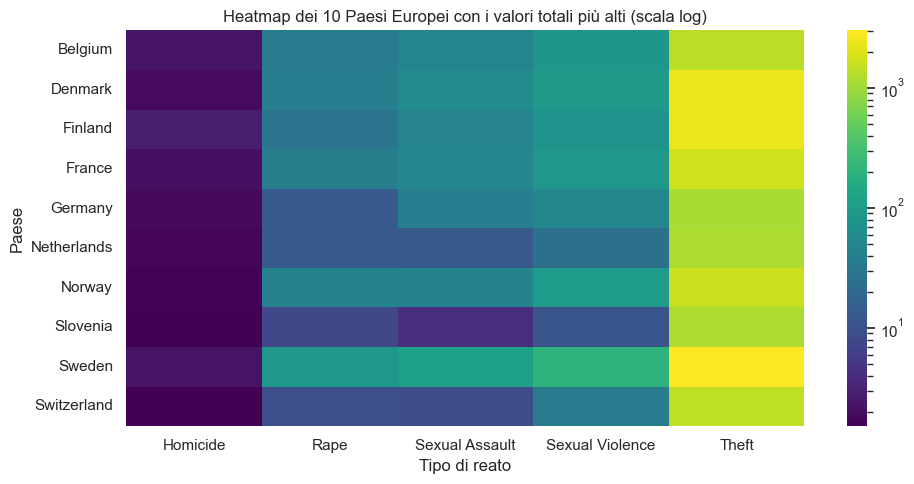

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Assumendo che 'data' sia un DataFrame con index = geo (Paesi) e colonne = reati.
data_clean = data.dropna()  # Rimuove eventuali NaN

# Seleziona i 10 paesi con il valore totale dei reati più alto
data_clean['Total'] = data_clean.sum(axis=1)
data_top10 = data_clean.nlargest(10, 'Total').drop(columns='Total')

# Ordina alfabeticamente i 10 paesi selezionati
data_top10 = data_top10.sort_index()

# Aggiunge un offset per evitare problemi con valore zero
offset = 1
data_log = data_top10 + offset

plt.figure(figsize=(10, 5))
sns.heatmap(data_log, cmap='viridis', norm=LogNorm(), cbar=True)

plt.title("Heatmap dei 10 Paesi Europei con i valori totali più alti (scala log)")
plt.xlabel("Tipo di reato")
plt.ylabel("Paese")
plt.tight_layout()
plt.show()
